In [1]:
import pyfirmata2
from time import sleep
import numpy as np

# PWM demo on port 5. The default PWM frequency is 1kHz.

# Adjust that the port match your system, see samples below:
# On Linux: /dev/tty.usbserial-A6008rIF, /dev/ttyACM0,
# On Windows: \\.\COM1, \\.\COM2
# PORT = '/dev/ttyACM0'
PORT = pyfirmata2.Arduino.AUTODETECT

# Creates a new board
board = pyfirmata2.Arduino(PORT)
print("Setting up the connection to the board ...")

# Setup the digital pin for PWM
pwm_5 = board.get_pin('d:5:p')

Setting up the connection to the board ...


In [31]:
sine_freq = 30
write_interval = 0.001

t = 0

while True:
    v = np.sin(2 * np.pi * sine_freq * t)
    pwm_5.write(0.5 + 0.5 * v)
    t += write_interval
    sleep(write_interval)

KeyboardInterrupt: 

In [25]:
def ramp(t, T):
    s = t % T
    if s < T/2:
        return 2 * s / T
    else:
        return 2 - 2 *s / T

In [21]:
ramp(0.51,1)

0.51


0.98

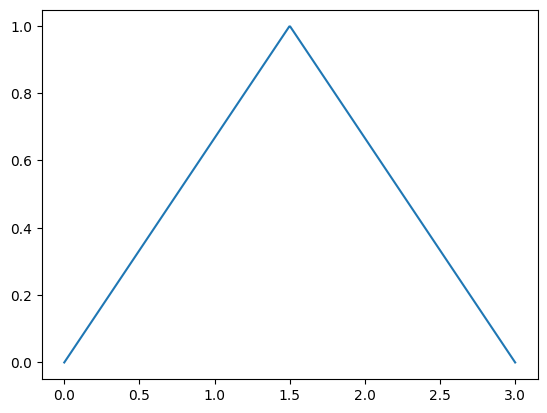

In [27]:
import matplotlib.pyplot as plt

T = 3
ts = np.linspace(0,T, 512)
plt.plot(ts, [ramp(t, T) for t in ts])

In [33]:
freq = 30
write_interval = 0.001

t = 0

while True:
    v = ramp(t, 1/freq)
    pwm_5.write(v)
    t += write_interval
    sleep(write_interval)

KeyboardInterrupt: 

In [34]:
pwm_5.write(0)